## NEURON

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.09713747e-07,  9.36403624e-08, -5.00000000e+01,
        1.50000000e+00])
soma { nseg=1  L=5.73534  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=5.73534}
	insert capacitance { cm=1.5}
}
Changed dt
Changed dt
Changed dt


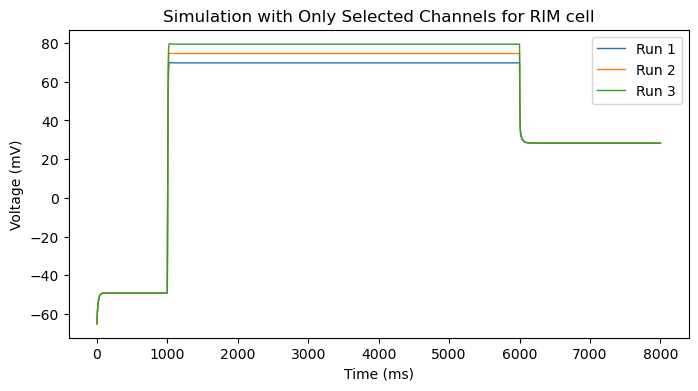

In [27]:

import sys
sys.path.append('..')  # the parent directory
from RIM_simulation_iclamp import RIM_simulation_iclamp
from g_to_Scm2 import gScm2
import pprint





surf=103.34e-8


# conductances in S/cm^2: SHL1, EGL2, IRK, CCA1, unc2, egl19, LEAK,eleak, cm

g0=[0.0009048750067326097,
    0.0001411644285181245,
    0.0003272854640954744,
    0.0008451919806776876,
    9.676795045480941e-05,
    0.00032005818627638106,
    9.676795045480941e-05,
    -50,1.5]



# leak 
g0 = [0, 
      0, 
      0, 
      0, 
      0,
      0,
      9.676795045480941e-05, 
      -50, 1.5]
# leak + unc2
g0=[0.0,
    0.0,
    0.0,
    0.0,
    9.676795045480941e-05,
    0.0,
    9.676795045480941e-05,
    -50,1.5]

# leak + cca1
g0 = [0.0,
    0.0,
    0.0,
    0.0008451919806776876,
    0,
    0.0,
    9.676795045480941e-05,
    -50,1.5]

# leak + egl2

g0 = [0.0,
    0.0001411644285181245,
    0.0,
    0.0,
    0,
    0.0,
    9.676795045480941e-05,
    -50,1.5]
# leak + shl1
g0=[0.0009048750067326097,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    9.676795045480941e-05,
    -50,1.5]
# leak + egl 19
g0=[0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.00032005818627638106,
    9.676795045480941e-05,
    -50,1.5]

        
gRIM_scaled = gScm2(g0,surf,6)
pprint.pprint(gRIM_scaled)

        


v, time1 = RIM_simulation_iclamp(g0, s1=0.015, s2=0.019, ns=3)
#s2 = 0.035
# best_cc=AIY_simulation_iclamp(gbest,-0.015,0.035,11)
# best_voltage=best_cc[0]
# best_time2=best_cc[1]
# best_VIss=best_cc[3]
# best_VIpeaks=best_cc[2]



# #Matplotlib


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'Run {i + 1}', linewidth=1)


plt.title('Simulation with Only Selected Channels for RIM cell')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')


plt.legend()
plt.show()





#Plotly
# # Plotting
# import plotly.graph_objects as go

# fig = go.Figure()
# for i in range(len(v)):
#     fig.add_trace(
#         go.Scatter(
#             x=time1[i], 
#             y=v[i], 
#             mode='lines', 
#             name=f'Run {i + 1}'  # Label each run
#         )
#     )
# fig.update_layout(
#     title='Simulation with Only ___ Channel',
#     xaxis_title='Time (ms)',
#     yaxis_title='Voltage (mV)',
#     template='plotly_white' ,
#     width = 800,
#     height = 400
# )
# fig.show()


## NeuroML

In [28]:
import pandas as pd
from pyneuroml import pynml

def run_simulation_and_get_results(lems_file):
    # Run the simulation with pyNeuroML
    print(f"Running simulation: {lems_file}")
    results = pynml.run_lems_with_jneuroml(
        lems_file, 
        max_memory="1024M", 
        nogui=True, 
        plot=False, 
        load_saved_data=True
    )

    # time and variable values
    time = results["t"]
    voltage_data = {}
    for key in results:
        if key.startswith("pop_RIM") and key.endswith("/v"):  # Filter voltage keys
            compartment = key.split("/")[1]  # Extract compartment index
            voltage_data[f"Run {compartment}"] = results[key]
    
    
    df = pd.DataFrame(voltage_data)
    df.insert(0, "Time (ms)", time)  # Add time as the first column
    return df


lems_file = "LEMS_Sim_IClamp_RIM.xml" 
df_RIM_NML = run_simulation_and_get_results(lems_file)
df_RIM_NML = df_RIM_NML * 1000 # Convert voltage from V to mV and time from s to ms
nml_time = df_RIM_NML.iloc[:, 0]
nml_voltages = df_RIM_NML.iloc[:, 1:4]

pyNeuroML >>> INFO - Loading LEMS file: LEMS_Sim_IClamp_RIM.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx1024M  -Djava.awt.headless=true -jar  "/Users/dakosh/mambaforge/lib/python3.10/site-packages/pyneuroml/utils/./../lib/jNeuroML-0.13.3-jar-with-dependencies.jar"  LEMS_Sim_IClamp_RIM.xml  -nogui -I '') in directory: .


Running simulation: LEMS_Sim_IClamp_RIM.xml


pyNeuroML >>> INFO - Command completed successfully!


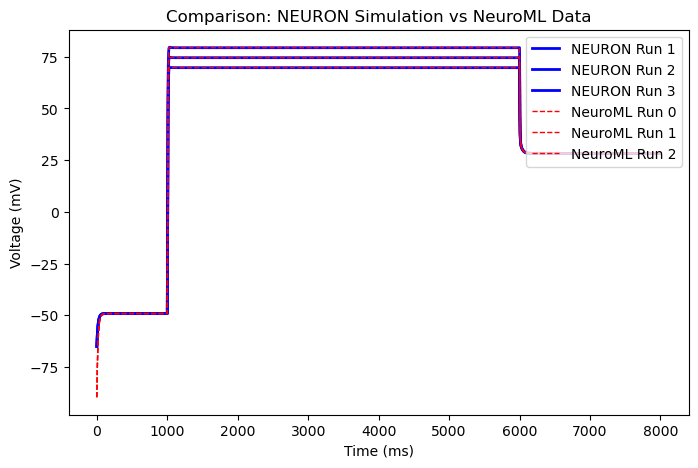

In [29]:
#matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# NEURON simulation data
for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'NEURON Run {i + 1}', linewidth=2, color='blue')

# NeuroML data
for col in nml_voltages.columns:
    plt.plot(nml_time, df_RIM_NML[col], label=f'NeuroML {col}', linewidth=1, color='red', linestyle='--')


plt.title('Comparison: NEURON Simulation vs NeuroML Data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

plt.legend(loc='upper right')

plt.show()


In [ ]:
# PLOTLY
import plotly.graph_objects as go

# # Create the Plotly figure
fig = go.Figure()

# Add NEURON simulation data to the plot
fig = go.Figure()

for i in range(len(v)):
    fig.add_trace(
        go.Scatter(
            x=time1[i], 
            y=v[i], 
            mode='lines', 
            name=f'NEURON Run {i + 1}', # Label each run
            line = dict(color = 'blue', width = 2)
        )
    )



# Add NeuroML data to the plot
for col in nml_voltages.columns:
    fig.add_trace(
        go.Scatter(
            x=nml_time,  # Time from NeuroML data
            y=df_RIM_NML[col],  # Voltage from NeuroML data
            mode='lines',
            name=f'NeuroML {col}',  # Label for each trace
            line=dict(color='red', dash='dash', width=1)
        )
    )

# Update layout for clarity
fig.update_layout(
    title='Comparison: NEURON Simulation vs NeuroML Data',
    xaxis_title='Time (ms)',
    yaxis_title='Voltage (mV)',
    template='plotly_white',
    legend=dict(x=0.99, y=0.99),  # Adjust legend position
    height=600,  
    width=800   
)

# Show the plot
fig.show()